In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
from tabulate import tabulate

**(Parameter Skenario 1, 5 Toko)**

In [5]:
num_ants = 5  # Jumlah semut yang digunakan dalam algoritma (m)
num_shops = 5 # Jumlah toko atau kota yang dikunjungi semut (n)
a = 0.1       # Tetapan Pengendali intensitas jejak semut (a)
b = 1         # Tetapan Pengendali visibilitas (b)
p = 0.5       # Tetapan penguapan jejak semut (p)
q = 1         # Tetapan siklus semut (q)
tij = 0.01    # Intensitas jejak pheromone semut (tij)
nc_max = 2    # Iterasi maksimum (nc_max)

shops = {
  1: (20, 25),
  2: (40, 30),
  3: (30, 45),
  4: (30, 35),
  5: (45, 55)
}

**(Parameter Skenario 2, 5 Toko)**

In [4]:
# num_ants = 5
# num_shops = 5
# a = 0.5
# b = 2
# p = 0.2
# q = 1.5
# tij = 0.02
# nc_max = 3

# shops = {
#  1: (20, 25),
#  2: (40, 30),
#  3: (30, 45),
#  4: (30, 35),
#  5: (45, 55)
# }

**(Parameter Skenario 3, 10 Toko)**

In [ ]:
# num_ants = 10
# num_shops = 10
# a = 0.7
# b = 1.8
# p = 0.1
# q = 2.0
# tij = 0.03
# nc_max = 4

# shops = {
#     1: (20, 25),
#     2: (40, 30),
#     3: (30, 45),
#     4: (30, 35),
#     5: (45, 55),
#     6: (25, 40),
#     7: (50, 20),
#     8: (35, 30),
#     9: (15, 45),
#     10: (40, 50)
# }

**(Parameter Skenario 4, 10 Toko)**

In [ ]:
# num_ants = 10
# num_shops = 10
# a = 0.8
# b = 2.5
# p = 0.15
# q = 2.5
# tij = 0.05
# nc_max = 5

# shops = {
#     1: (20, 25),
#     2: (40, 30),
#     3: (30, 45),
#     4: (30, 35),
#     5: (45, 55),
#     6: (25, 40),
#     7: (50, 20),
#     8: (35, 30),
#     9: (15, 45),
#     10: (40, 50)
# }

In [6]:
def display_shop_data():
    shop_data = []
    for shop, (x, y) in shops.items():
        shop_data.append([shop, x, y])
    table = tabulate(shop_data, headers=['Toko Ke', 'Koordinat X', 'Koordinat Y'], tablefmt='pretty')
    print(table)

print("Data koordinat dari masing masing toko :")
display_shop_data()

Data koordinat dari masing masing toko :
+---------+-------------+-------------+
| Toko Ke | Koordinat X | Koordinat Y |
+---------+-------------+-------------+
|    1    |     20      |     25      |
|    2    |     40      |     30      |
|    3    |     30      |     45      |
|    4    |     30      |     35      |
|    5    |     45      |     55      |
+---------+-------------+-------------+


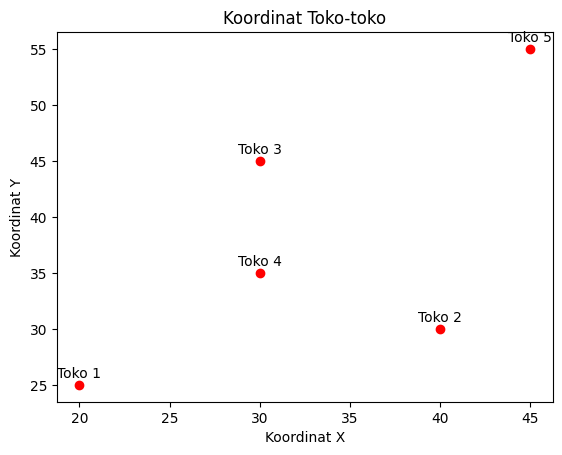

In [7]:
def plot_shop_coordinates():
    x_coords = [coord[0] for coord in shops.values()]
    y_coords = [coord[1] for coord in shops.values()]
    plt.scatter(x_coords, y_coords, color='red', marker='o')
    for shop, (x, y) in shops.items():
        plt.annotate(f'Toko {shop}', (x, y), textcoords="offset points", xytext=(0,5), ha='center')
    plt.title('Koordinat Toko-toko')
    plt.xlabel('Koordinat X')
    plt.ylabel('Koordinat Y')
    plt.show()

plot_shop_coordinates()

$ \text{distance}(i, j) = \sqrt{ (x_{i} - x_{j})^2 + (y_{i} - y_{j})^2 } $
- $ \text{x}_{i} \text{ dan } \text{y}_{i} \text{ adalah koordinat toko ke-1} $
- $ \text{x}_{j} \text{ dan } \text{y}_{j} \text{ adalah koordinat toko ke-2} $

Contoh :
- $ \text{distance}(2, 1) = \sqrt{ ({40} - {20})^2 + ({30} - {25})^2 } $
- $ \text{distance}(2, 1) = \text{ 20.616 } $

In [8]:
def calculate_distance_matrix_before_round(shops):
    num_shops = len(shops)
    distance_matrix = np.zeros((num_shops, num_shops))
    for i in range(num_shops):
        for j in range(num_shops):
            if i != j:
                distance_matrix[i][j] = np.sqrt((shops[i+1][0] - shops[j+1][0])**2 + (shops[i+1][1] - shops[j+1][1])**2)
    return distance_matrix

def display_distance_matrix_before_round(distance_matrix):
    headers = [f'Toko {i}' for i in range(1, num_shops + 1)]
    vertical_headers = [f'Toko {i}' for i in range(1, num_shops + 1)]
    table_data = [[f'{distance:.3f}' for distance in row] for row in distance_matrix]
    table = tabulate(table_data, headers, tablefmt='pretty', showindex=vertical_headers)
    print(table)

distance_matrix = calculate_distance_matrix_before_round(shops)
print("Jarak antar toko (dij) sebelum pembulatan : ")
display_distance_matrix_before_round(distance_matrix)

Jarak antar toko (dij) sebelum pembulatan : 
+--------+--------+--------+--------+--------+--------+
|        | Toko 1 | Toko 2 | Toko 3 | Toko 4 | Toko 5 |
+--------+--------+--------+--------+--------+--------+
| Toko 1 | 0.000  | 20.616 | 22.361 | 14.142 | 39.051 |
| Toko 2 | 20.616 | 0.000  | 18.028 | 11.180 | 25.495 |
| Toko 3 | 22.361 | 18.028 | 0.000  | 10.000 | 18.028 |
| Toko 4 | 14.142 | 11.180 | 10.000 | 0.000  | 25.000 |
| Toko 5 | 39.051 | 25.495 | 18.028 | 25.000 | 0.000  |
+--------+--------+--------+--------+--------+--------+


In [9]:
def calculate_distance_matrix(shops):
    num_shops = len(shops)
    distance_matrix = np.zeros((num_shops, num_shops), dtype=int)
    for i in range(num_shops):
        for j in range(num_shops):
            if i != j:
                distance = np.sqrt((shops[i + 1][0] - shops[j + 1][0]) ** 2 + (shops[i + 1][1] - shops[j + 1][1]) ** 2)
                distance = round(distance, 4)
                distance_matrix[i][j] = distance
    return distance_matrix

def display_distance_matrix(distance_matrix):
    headers = [f'Toko {i}' for i in range(1, num_shops + 1)]
    vertical_headers = [f'Toko {i}' for i in range(1, num_shops + 1)]
    table_data = [[f'{distance}' for distance in row] for row in distance_matrix]
    table = tabulate(table_data, headers, tablefmt='pretty', showindex=vertical_headers)
    print(table)

distance_matrix = calculate_distance_matrix(shops)
print("Jarak antar toko (dij) :")
display_distance_matrix(distance_matrix)

Jarak antar toko (dij) :
+--------+--------+--------+--------+--------+--------+
|        | Toko 1 | Toko 2 | Toko 3 | Toko 4 | Toko 5 |
+--------+--------+--------+--------+--------+--------+
| Toko 1 |   0    |   20   |   22   |   14   |   39   |
| Toko 2 |   20   |   0    |   18   |   11   |   25   |
| Toko 3 |   22   |   18   |   0    |   10   |   18   |
| Toko 4 |   14   |   11   |   10   |   0    |   25   |
| Toko 5 |   39   |   25   |   18   |   25   |   0    |
+--------+--------+--------+--------+--------+--------+


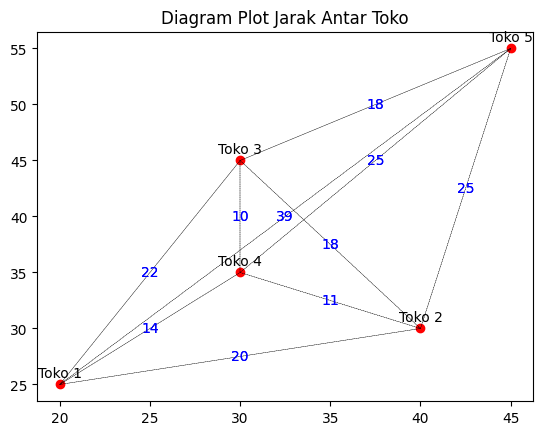

In [10]:
def plot_distance_matrix(shops, distance_matrix):
    x = [coord[0] for coord in shops.values()]
    y = [coord[1] for coord in shops.values()]
    plt.scatter(x, y, color='red')

    for i, txt in enumerate(shops.keys()):
        plt.annotate(f'Toko {txt}', (x[i], y[i]), textcoords="offset points", xytext=(0, 5), ha='center')
    for i in range(num_shops):
        for j in range(num_shops):
            if i != j:
                plt.plot([x[i], x[j]], [y[i], y[j]], color='black', linestyle='--', linewidth=0.25)
                midpoint_x = (x[i] + x[j]) / 2
                midpoint_y = (y[i] + y[j]) / 2
                plt.text(midpoint_x, midpoint_y, f'{distance_matrix[i, j]}', ha='center', va='center', fontsize=10, color='blue')

    plt.title('Diagram Plot Jarak Antar Toko')
    plt.show()

plot_distance_matrix(shops, distance_matrix)

$ \text{visibility}(i, j) = \frac{1}{\text{distance_matrix}(i, j)} $ <br>
Dengan $ \text{i} \text { != } \text {j} $ (untuk elemen non diagonal) <br>
Contoh : <br>
* $ \text{visibility}(2, 1) = \frac{1}{\text{20}} $
* $ \text{visibility}(2, 1) = \text{0.05} $

In [11]:
def calculate_visibility_matrix(distance_matrix):
    visibility_matrix = np.zeros((num_shops, num_shops), dtype=float)
    for i in range(num_shops):
        for j in range(num_shops):
            if i != j:
                visibility = 1.0 / distance_matrix[i][j]
                visibility = round(visibility, 4)
                visibility_matrix[i][j] = visibility
    return visibility_matrix

def display_visibility_matrix(visibility_matrix):
    headers = [f'Toko {i}' for i in range(1, num_shops + 1)]
    vertical_headers = [f'Toko {i}' for i in range(1, num_shops + 1)]
    table_data = [[f'{visibility:.4f}' for visibility in row] for row in visibility_matrix]
    table = tabulate(table_data, headers, tablefmt='pretty', showindex=vertical_headers)
    print(table)

visibility_matrix = calculate_visibility_matrix(distance_matrix)
print("Nilai Matriks Visibilitas Antar Toko (nij) : ")
display_visibility_matrix(visibility_matrix)

Nilai Matriks Visibilitas Antar Toko (nij) : 
+--------+--------+--------+--------+--------+--------+
|        | Toko 1 | Toko 2 | Toko 3 | Toko 4 | Toko 5 |
+--------+--------+--------+--------+--------+--------+
| Toko 1 | 0.0000 | 0.0500 | 0.0455 | 0.0714 | 0.0256 |
| Toko 2 | 0.0500 | 0.0000 | 0.0556 | 0.0909 | 0.0400 |
| Toko 3 | 0.0455 | 0.0556 | 0.0000 | 0.1000 | 0.0556 |
| Toko 4 | 0.0714 | 0.0909 | 0.1000 | 0.0000 | 0.0400 |
| Toko 5 | 0.0256 | 0.0400 | 0.0556 | 0.0400 | 0.0000 |
+--------+--------+--------+--------+--------+--------+


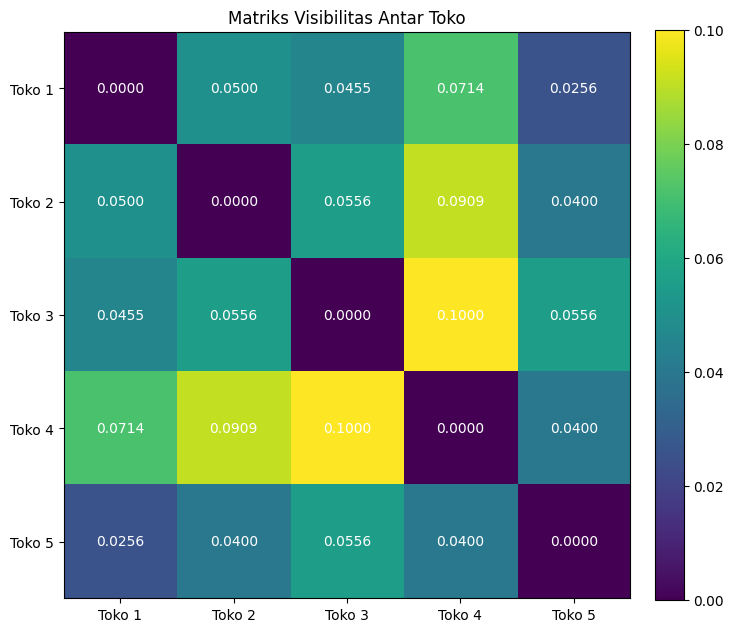

In [12]:
def plot_visibility_matrix(visibility_matrix):
    fig, ax = plt.subplots(figsize=(8, 8))
    im = ax.imshow(visibility_matrix, cmap='viridis')
    ax.set_xticks(np.arange(num_shops))
    ax.set_yticks(np.arange(num_shops))
    ax.set_xticklabels([f'Toko {i}' for i in range(1, num_shops + 1)])
    ax.set_yticklabels([f'Toko {i}' for i in range(1, num_shops + 1)])

    for i in range(num_shops):
        for j in range(num_shops):
            text = ax.text(j, i, f'{visibility_matrix[i, j]:.4f}', ha='center', va='center', color='w')

    cbar = ax.figure.colorbar(im, ax=ax, cmap='viridis', fraction=0.046, pad=0.04)
    plt.title('Matriks Visibilitas Antar Toko')
    plt.show()

plot_visibility_matrix(visibility_matrix)

* Rumus untuk memilih toko selanjutnya : <br>
$ P(\text{shop}_k) = \frac{(\text{local_pheromone}_{\text{current_shop}, \text{shop}_k})^a \cdot (1/\text{distance}_{\text{current_shop}, \text{shop}_k})^b}{\sum_{j \in \text{unvisited_shops}} (\text{local_pheromone}_{\text{current_shop}, j})^a \cdot (1/\text{distance}_{\text{current_shop}, j})^b} $ <br><br>
* Rumus untuk memperbarui matriks pheromone lokal : <br>
$ \text{local_pheromone_update}_{\text{from_shop}, \text{to_shop}} = (1 - p) \cdot \text{local_pheromone}_{\text{from_shop}, \text{to_shop}} + p \cdot \frac{1}{\text{path_length}} $

In [13]:
def initialize_local_pheromone_matrix(num_shops):
    return np.ones((num_shops, num_shops), dtype=float)

def select_next_shop(current_shop, visited_shops, local_pheromone_matrix, distance_matrix, a, b):
    unvisited_shops = [shop for shop in range(len(local_pheromone_matrix)) if shop not in visited_shops]
    probabilities = []

    for shop in unvisited_shops:
        pheromone = local_pheromone_matrix[current_shop][shop]
        visibility = 1 / distance_matrix[current_shop][shop]
        probability = (pheromone**a) * (visibility**b)
        probabilities.append((shop, probability))

    probabilities = sorted(probabilities, key=lambda x: x[1], reverse=True)
    selected_shop = probabilities[0][0]
    return selected_shop

def update_local_pheromone_matrix(local_pheromone_matrix, visited_shops, p, path_length):
    for i in range(len(visited_shops) - 1):
        from_shop = visited_shops[i]
        to_shop = visited_shops[i + 1]
        local_pheromone_update = (1 - p) * local_pheromone_matrix[from_shop][to_shop] + (p * (1 / path_length))
        local_pheromone_matrix[from_shop][to_shop] = local_pheromone_update

Rumus menentukan histori pencarian
* $ H = [(\text{visited_shops}^{(1)}, \text{path_length}^{(1)}), (\text{visited_shops}^{(2)}, \text{path_length}^{(2)}), \ldots, (\text{visited_shops}^{(T)}, \text{path_length}^{(T)})] $ <br>

Rumus menghitung panjang rute :
* $ \text{path_length} = \sum_{i=1}^{n-1} \text{distance_matrix}[\text{visited_shops}[i]][\text{visited_shops}[i + 1]] $


In [14]:
def calculate_path_length(visited_shops, distance_matrix):
    path_length = sum(distance_matrix[visited_shops[i]][visited_shops[i + 1]] for i in range(len(visited_shops) - 1))
    return path_length

def run_aco_with_history(num_ants, num_shops, local_pheromone_matrix, distance_matrix, a, b, p):
    best_ant = None
    best_path_length = float('inf')
    search_history = []

    for ant_num in range(1, num_ants + 1):
        visited_shops = []
        current_shop = random.randint(0, num_shops - 1)
        visited_shops.append(current_shop)

        while len(visited_shops) < num_shops:
            next_shop = select_next_shop(current_shop, visited_shops, local_pheromone_matrix, distance_matrix, a, b)
            visited_shops.append(next_shop)
            current_shop = next_shop

        visited_shops.append(visited_shops[0])
        path_length = sum(distance_matrix[visited_shops[i]][visited_shops[i + 1]] for i in range(num_shops))
        update_local_pheromone_matrix(local_pheromone_matrix, visited_shops, p, path_length)

        if path_length < best_path_length:
            best_path_length = path_length
            best_ant = visited_shops.copy()

        search_history.append((visited_shops.copy(), path_length))

    return best_ant, best_path_length, search_history

local_pheromone_matrix = initialize_local_pheromone_matrix(num_shops)

# num_ants = 10
best_ant, best_path_length, search_history = run_aco_with_history(num_ants, num_shops, local_pheromone_matrix, distance_matrix, a, b, p)

print("Riwayat Pencarian Jalur Terpendek:")
for i, (path, length) in enumerate(search_history, 1):
    # print(f"Langkah {i}: {[shop + 1 for shop in path]}, Panjang Rute: {length * 0.001:.3f}")
    print(f"Langkah {i}: {[shop + 1 for shop in path]}, Panjang Rute: {length}")

Riwayat Pencarian Jalur Terpendek:
Langkah 1: [3, 4, 2, 1, 5, 3], Panjang Rute: 98
Langkah 2: [2, 4, 3, 5, 1, 2], Panjang Rute: 98
Langkah 3: [1, 4, 3, 2, 5, 1], Panjang Rute: 106
Langkah 4: [3, 4, 2, 1, 5, 3], Panjang Rute: 98
Langkah 5: [4, 3, 5, 2, 1, 4], Panjang Rute: 87


In [15]:
def run_aco(num_ants, num_shops, local_pheromone_matrix, distance_matrix, a, b, p):
    best_ant = None
    best_path_length = float('inf')

    for ant_num in range(1, num_ants + 1):
        visited_shops = []
        current_shop = random.randint(0, num_shops - 1)
        visited_shops.append(current_shop)

        while len(visited_shops) < num_shops:
            next_shop = select_next_shop(current_shop, visited_shops, local_pheromone_matrix, distance_matrix, a, b)
            visited_shops.append(next_shop)
            current_shop = next_shop

        if visited_shops[-1] != 0:
            visited_shops.append(0)

        path_length = sum(distance_matrix[visited_shops[i]][visited_shops[i+1]] for i in range(num_shops))
        update_local_pheromone_matrix(local_pheromone_matrix, visited_shops, p, path_length)

        if path_length < best_path_length:
            best_path_length = path_length
            best_ant = visited_shops.copy()

    return best_ant, best_path_length

print("Hasil Rute Terbaik:")
best_route = [shop + 1 for shop in best_ant]
print(best_route)

print("\nJarak Antar Titik Berdasarkan Rute Terbaik:")
total_distance = 0
for i in range(len(best_ant) - 1):
    from_shop = best_ant[i]
    to_shop = best_ant[i + 1]
    distance = distance_matrix[from_shop][to_shop]
    total_distance += distance
    print(f"Toko {from_shop + 1} ke Toko {to_shop + 1}: {distance}")

print(f"\nPanjang Rute Terbaik: {total_distance}")

Hasil Rute Terbaik:
[4, 3, 5, 2, 1, 4]

Jarak Antar Titik Berdasarkan Rute Terbaik:
Toko 4 ke Toko 3: 10
Toko 3 ke Toko 5: 18
Toko 5 ke Toko 2: 25
Toko 2 ke Toko 1: 20
Toko 1 ke Toko 4: 14

Panjang Rute Terbaik: 87


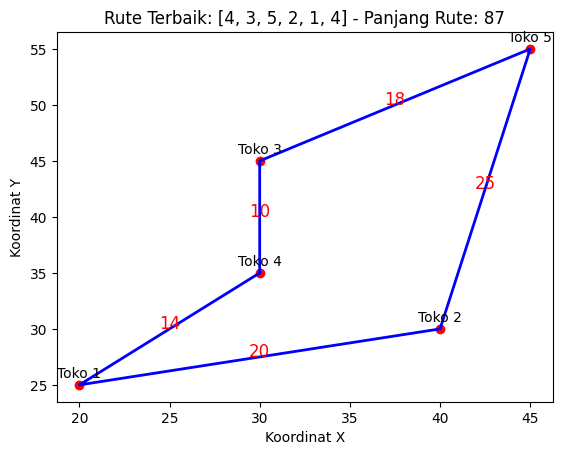

In [16]:
def visualize_best_route(shops, best_ant, best_path_length, decimal_places=2):
    x_coords = [coord[0] for coord in shops.values()]
    y_coords = [coord[1] for coord in shops.values()]
    plt.scatter(x_coords, y_coords, color='red', marker='o')

    for shop, (x, y) in shops.items():
        plt.annotate(f'Toko {shop}', (x, y), textcoords="offset points", xytext=(0,5), ha='center')

    best_x_coords = [x_coords[i] for i in best_ant]
    best_y_coords = [y_coords[i] for i in best_ant]
    plt.plot(best_x_coords, best_y_coords, color='blue', linestyle='-', linewidth=2)
    plt.title(f'Rute Terbaik: {best_route} - Panjang Rute: {best_path_length}')
    plt.xlabel('Koordinat X')
    plt.ylabel('Koordinat Y')

    for i in range(len(best_ant) - 1):
      from_shop = best_ant[i]
      to_shop = best_ant[i + 1]
      distance = np.sqrt((x_coords[to_shop] - x_coords[from_shop])**2 + (y_coords[to_shop] - y_coords[from_shop])**2)
      rounded_distance = math.floor(distance)
      plt.annotate(f'{rounded_distance}', ((x_coords[to_shop] + x_coords[from_shop]) / 2, (y_coords[to_shop] + y_coords[from_shop]) / 2), ha='center', color='red', fontsize=12)

    plt.show()

visualize_best_route(shops, best_ant, best_path_length, decimal_places=2)